# Jobsheet 02 - Regression

Isikan identitas berikut

NIM: 2041720006

Nama: Iftitah Hidayati

Kelas: TI 3H

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/Data/PembelajaranMesin/P3/DatasetP3/BBRI.JK.csv')
data.head()

# path='/content/drive/MyDrive/Data/PembelajaranMesin/P3/DatasetP3/dataP3.csv'
# df = pd.read_csv(path)
# df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-13,3710.0,3750.0,3660.0,3700.0,3558.921143,169825000
1,2021-09-14,3720.0,3730.0,3660.0,3700.0,3558.921143,216363400
2,2021-09-15,3670.0,3670.0,3620.0,3660.0,3520.446289,263544000
3,2021-09-16,3650.0,3660.0,3610.0,3640.0,3501.208740,194782800
4,2021-09-17,3630.0,3640.0,3570.0,3610.0,3472.352783,346529100


In [ ]:
# pemahaman terhadap data
# ubah type data

# ukuran data
data.shape

# info data

# data = df._convert(numeric=True)
data.info()
# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


,Open,High,Low,Close,Adj Close,Volume
count,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02
mean,4304.857143,4347.102041,4261.306122,4303.346939,4222.741295,1.718224e+08
std,257.382155,255.723359,247.900876,248.360654,294.292541,9.537914e+07
min,3510.000000,3580.000000,3500.000000,3570.000000,3433.877930,2.767650e+07
25%,4170.000000,4200.000000,4130.000000,4160.000000,4020.618896,1.047380e+08
50%,4300.000000,4340.000000,4260.000000,4300.000000,4250.000000,1.484756e+08
75%,4460.000000,4510.000000,4410.000000,4450.000000,4400.000000,2.082533e+08
max,4900.000000,4980.000000,4860.000000,4940.000000,4940.000000,6.345496e+08


### Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


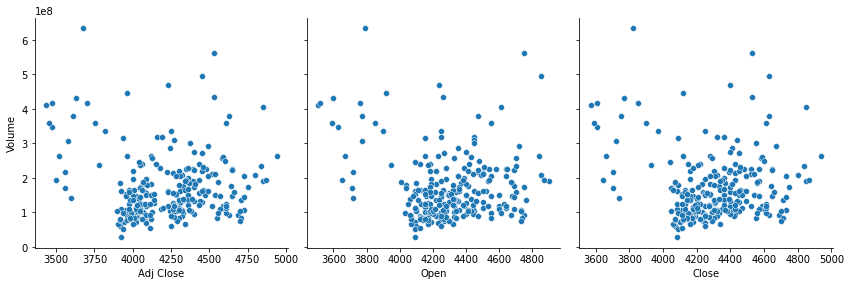

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Adj Close', 'Open','Close'], 
             y_vars='Volume', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

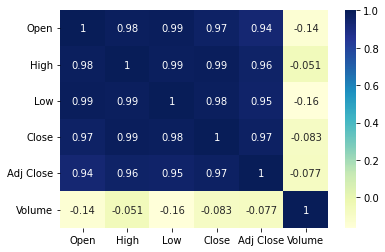

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Close']
y = data['High']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

189    4350.0
145    4620.0
74     4110.0
235    4300.0
198    4110.0
        ...  
87     4210.0
103    4550.0
67     4220.0
24     4330.0
8      3770.0
Name: High, Length: 171, dtype: float64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const   -33.199517
Close     1.017637
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     9422.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.81e-150
Time:                        08:53:34   Log-Likelihood:                -849.06
No. Observations:                 171   AIC:                             1702.
Df Residuals:                     169   BIC:                             1708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.1995     45.053     -0.737      0.462    -122.138      55.739
Close          1.0176      0.010     97.065      0.000       0.997       1.038
==============================================================================
Omnibus:                       54.580   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.748
Skew:                           1.331   Prob(JB):                     6.10e-32
Kurtosis:                       6.617   Cond. No.                     7.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

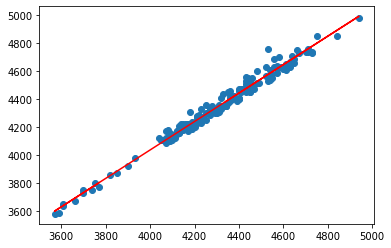

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, -33.199517 + 1.017637*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


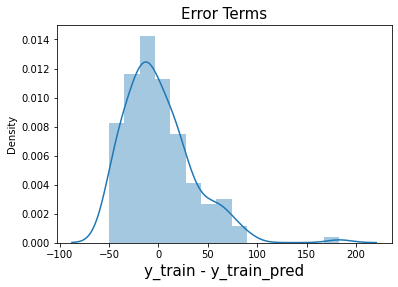

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

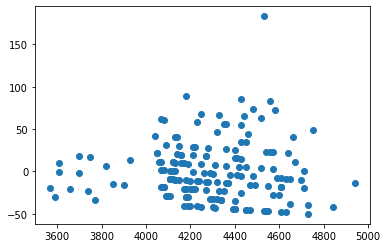

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


65     4169.639449
59     4149.286718
191    4342.637663
111    4474.930415
112    4535.988608
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9700816196890615

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.9700816196890615 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

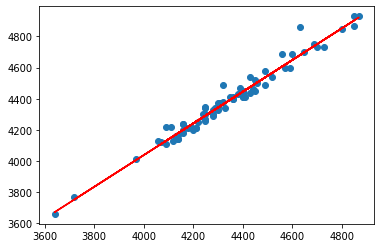

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

**Regresi Linier Berganda**

In [ ]:
# define x1 x2 dan y
# untuk regresi linier berganda pada kasus kali ini, selain  Close sebagai X1 dan Open sebagai X2
xbaru = data[['Close','Open']]
ybaru = data['High']

In [ ]:
xConst = sm.add_constant(xbaru)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(ybaru, xConst).fit()
predictions = model.predict(xConst)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.86e-241
Time:                        09:27:13   Log-Likelihood:                -1145.0
No. Observations:                 245   AIC:                             2296.
Df Residuals:                     242   BIC:                             2307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.7957     28.965     -1.236      0.2